<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/Session4Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
finding the value for which the function has minimum value.
Hence can be used to find values of parameters of regression curve for which the loss/cost function is minimum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# let the cost function be - y = x2+3x+1
# first we plot the function
y = np.zeros(21)
x = np.array([i for i in range(-10, 11)])
for i in range(-10, 11):
  y[10+i]=((i**2)+(3*i)+1)

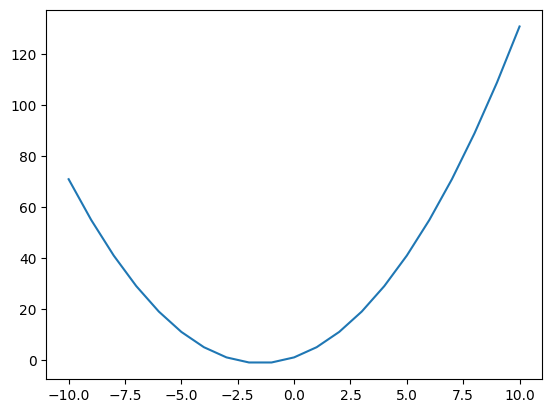

In [7]:
plt.plot(x, y)

In [18]:
val=10 # initial value any random
learningRate=0.1 # it decides the overall step size
maxSteps=100 # it decides how long to find min
valList = list()
valList.append(val)

# get all the x for reaching min
for i in range(maxSteps):
  slope = 2*val+3
  step = slope*learningRate
  if(step<0.001):
    break
  else:
    val = val - step
    valList.append(val)

# get the corresponding y for the x that we used
ylist = list()
for i in range(len(valList)):
  ylist.append(valList[i]**2+valList[i]*3+1)

now we have values from 0 till min with variable step size depending on the slope
and the corresponding y points

now we visualize it

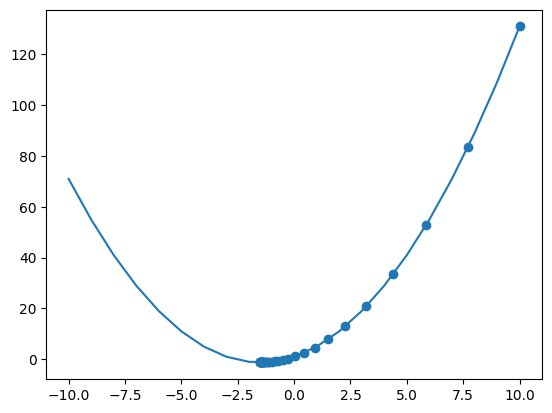

In [19]:
plt.plot(x, y)
plt.scatter(valList, ylist)

# Classification & its metrics

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

In [22]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_test = rfc.predict(X_test)

In [30]:
cm = confusion_matrix(y_pred_test, y_test)

#### metrics

In [35]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

accuracy

In [36]:
print((TP+TN)/(TP+TN+FP+FN))

0.7619047619047619


precision

In [37]:
print(TP/(TP+FP))

0.8767123287671232


Negative Predictive Value

In [41]:
print(TN/(TN+FN))

0.5647058823529412


sensitivity

In [38]:
print(TP/(TP+FN))

0.7757575757575758


specificity

In [40]:
print(TN/(TN+FP))

0.7272727272727273
